In [18]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.action_chains import ActionChains
import time
import numpy as np
from PIL import Image
from PIL import ImageGrab
import io
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torch.optim import Adam,SGD
from torch.utils import data

In [14]:
game_url = "chrome://dino"
our_game = "https://regressionist.github.io/Game/index.html"

0.18927812576293945


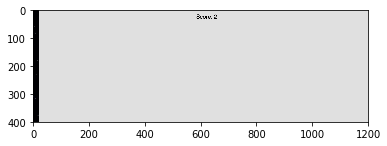

0.5143222808837891


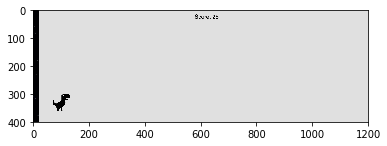

0.84281325340271


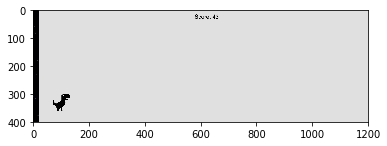

1.1592490673065186


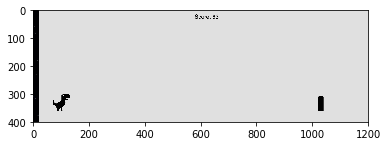

1.4709880352020264


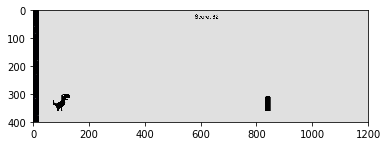

1.8060142993927002


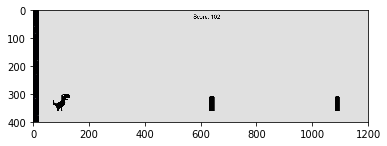

2.1197659969329834


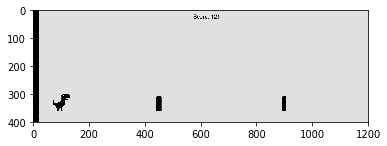

2.442624092102051


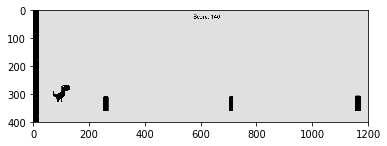

2.7699921131134033


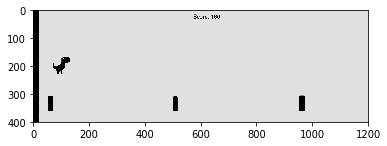

3.0929901599884033


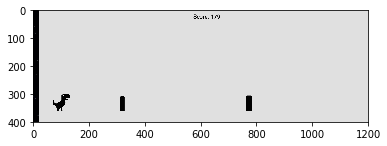

3.6078760623931885


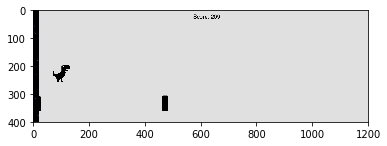

3.9659531116485596


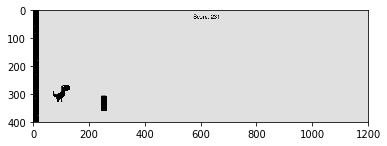

4.2892680168151855


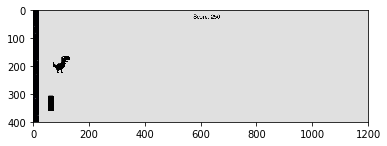

4.60709023475647


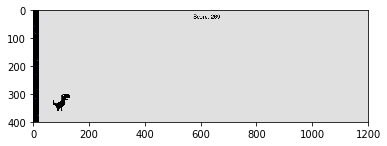

4.946969032287598


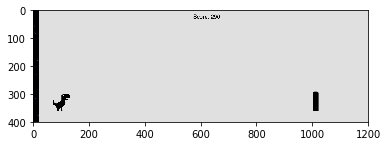

5.257383108139038


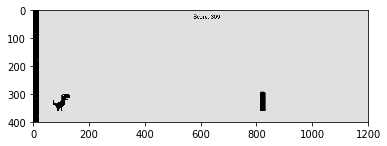

5.568051099777222


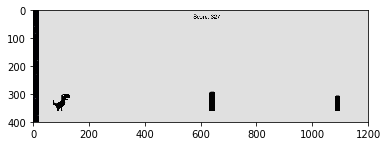

5.888488292694092


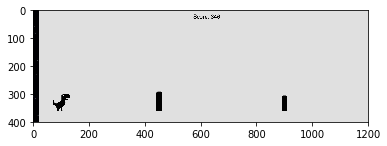

6.202940225601196


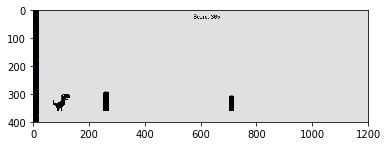

6.517040014266968


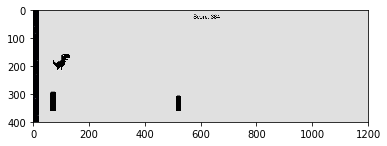

6.8309502601623535


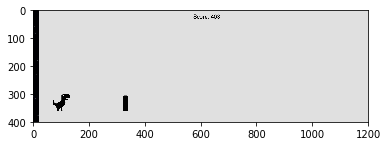

7.145546913146973


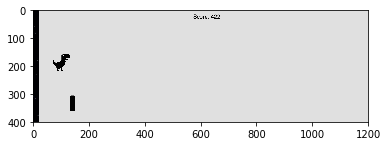

7.654016017913818


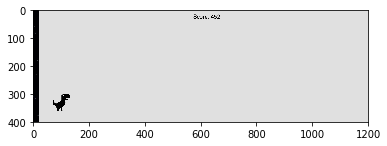

7.9690260887146


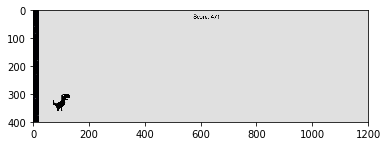

8.283336162567139


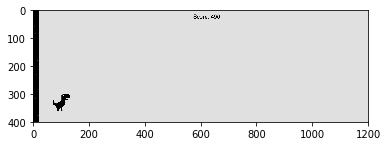

8.603007078170776


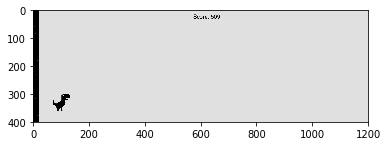

8.958039999008179


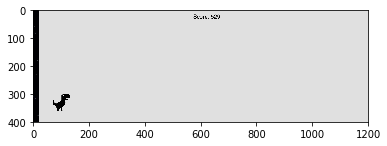

9.270632266998291


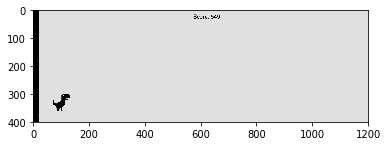

9.586823225021362


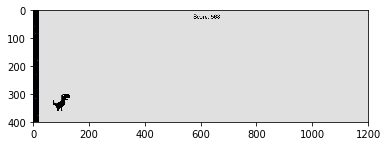

9.89957308769226


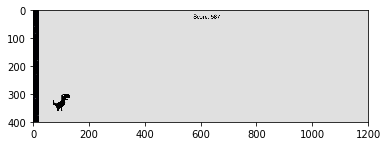

10.21113109588623


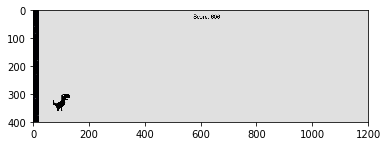

10.536317110061646


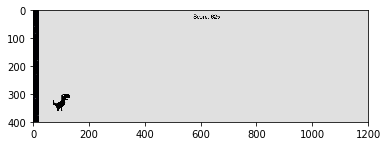

10.848625183105469


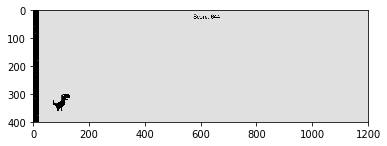

11.169892072677612


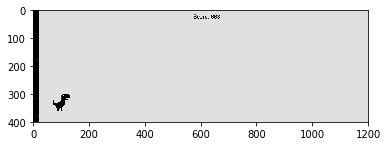

11.55944013595581


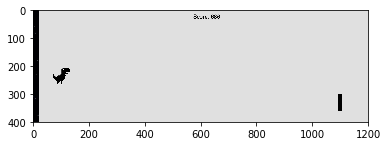

11.87328815460205


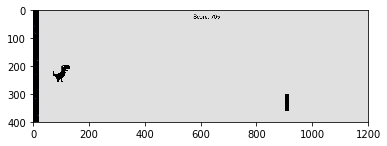

12.192568063735962


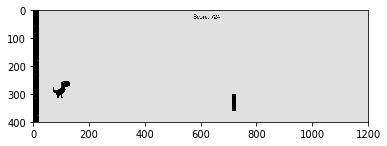

12.519571304321289


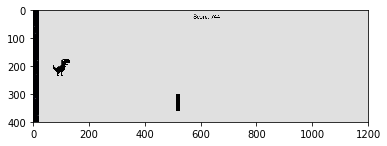

12.840251207351685


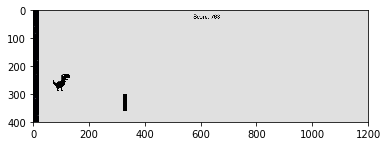

13.156203031539917


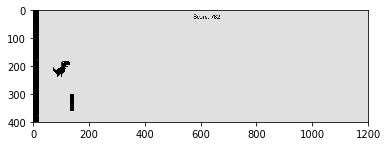

13.468851089477539


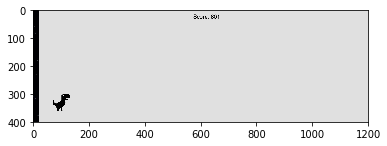

13.785309076309204


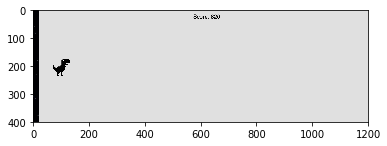

14.112796068191528


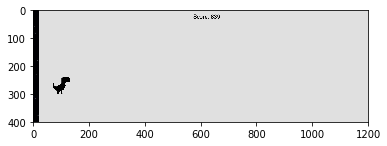

14.440860271453857


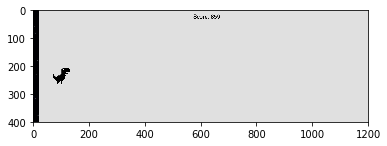

14.749801874160767


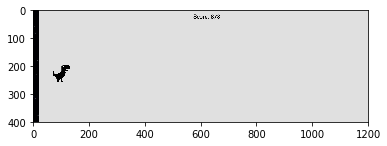

15.068768978118896


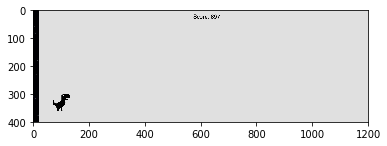

15.455245018005371


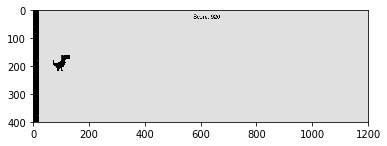

15.779051065444946


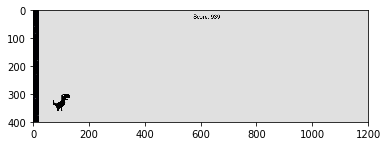

16.091398239135742


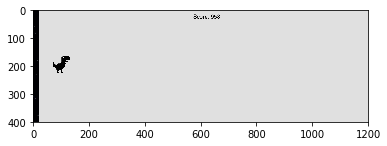

16.401369094848633


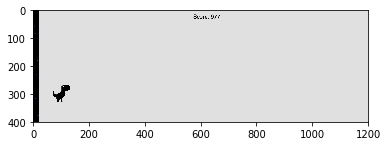

16.71769118309021


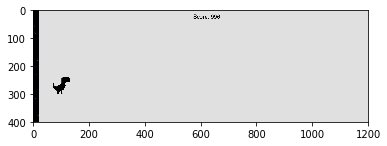

17.033265113830566


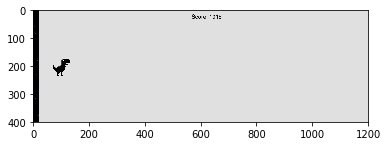

17.34656310081482


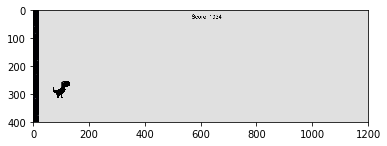

17.659125089645386


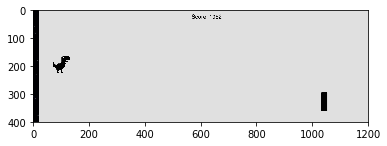

17.987373113632202


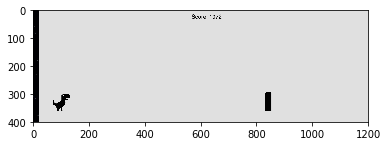

18.30635905265808


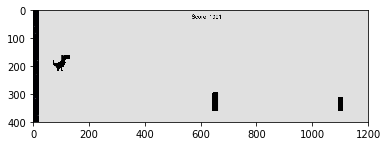

18.62063217163086


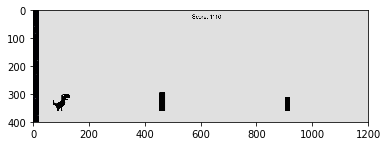

18.93675708770752


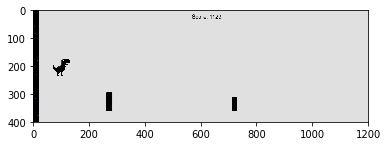

19.31142497062683


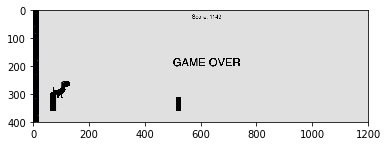

19.583956003189087


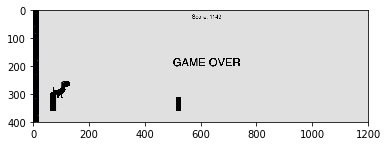

0.14867901802062988


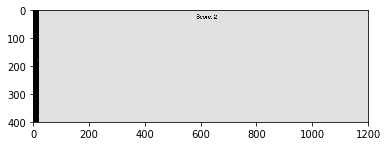

0.4724140167236328


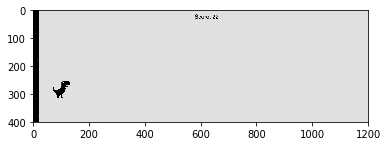

0.7952420711517334


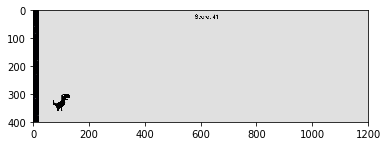

1.110914707183838


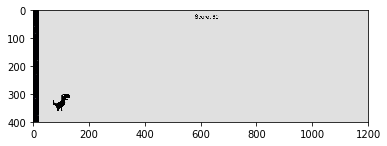

1.4218850135803223


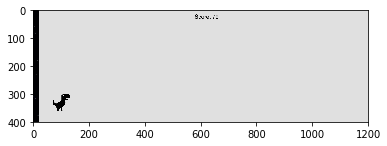

1.766786813735962


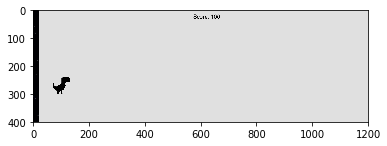

2.1175429821014404


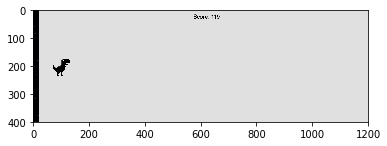

2.4374008178710938


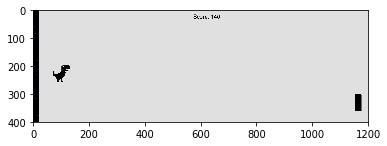

2.7578439712524414


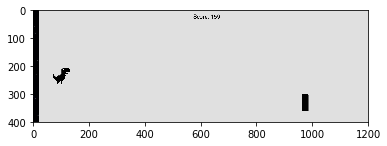

3.0701849460601807


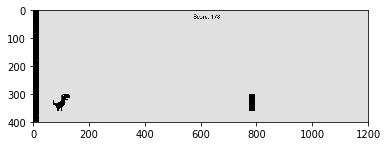

3.545254945755005


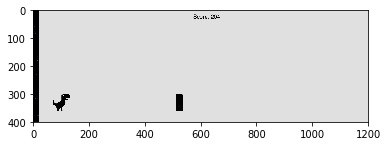

3.899770975112915


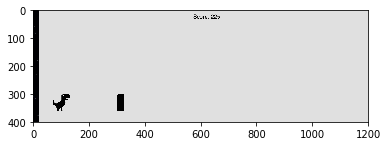

4.236277103424072


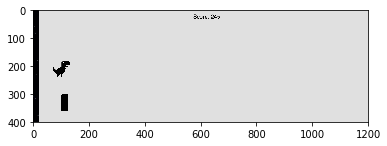

4.565345048904419


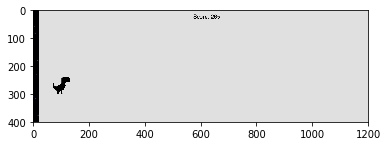

4.875664949417114


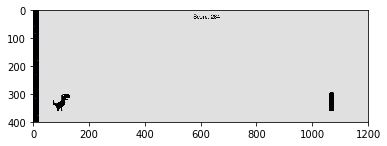

5.1926679611206055


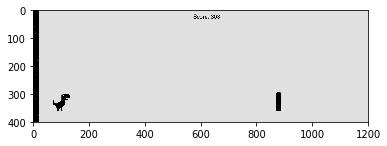

5.5098559856414795


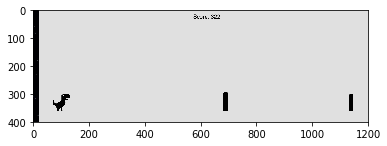

5.824248790740967


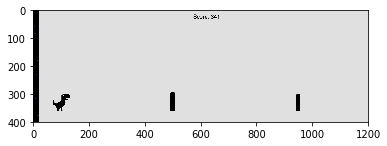

6.158893823623657


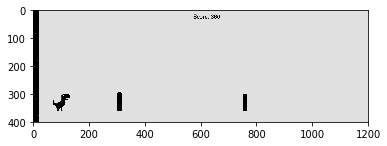

6.4931910037994385


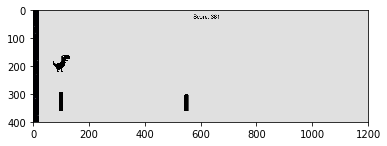

6.810515880584717


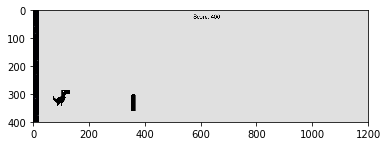

7.124504804611206


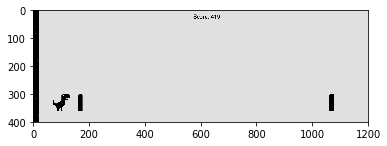

7.496705770492554


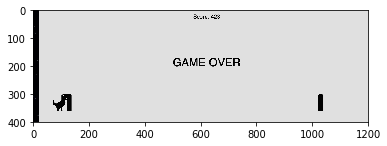

7.770196914672852


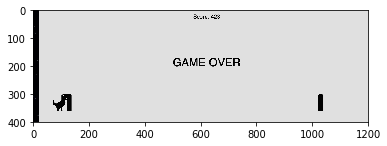

In [28]:
for restart in range(2):
    options = webdriver.ChromeOptions()
    options.add_argument('--ignore-certificate-errors')
    options.add_argument("--test-type")
    options.add_argument("--start-maximized")
    driver = webdriver.Chrome(options=options)
    driver.get(our_game)
    img_last=0
    counter=0
    start = time.time()
    while(counter!=1):
        img=np.array(ImageGrab.grab())[300:700,0:1200]
        print((time.time()-start)%60)
        plt.imshow(img)
        plt.show()
        if (np.array_equal(img,img_last)):
            counter=1
        img_last=img


In [12]:
class DeepQAgent(nn.Module):
    def __init__(self):
        super(DeepQAgent,self).__init__()
        self.conv1=nn.Sequential(nn.Conv2d(4,32,8,4,0),nn.ReLU())
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)
        self.conv2=nn.Sequential(nn.Conv2d(32,64,4,2,0),nn.ReLU())
        self.conv3=nn.Sequential(nn.Conv2d(64,64,3,1,0),nn.ReLU())
        self.linear1=nn.Sequential(nn.Linear(1600,256),nn.ReLU())
        self.linear2=nn.Sequential(nn.Linear(256,1),nn.ReLU())
        
    def forward(self,input_img):
        out=self.maxpool1(self.conv1(input_image))
        out=self.conv3(self.conv2(out))
        out=out.view(-1)
        out=F.sigmoid(self.linear2(self.linear1(out)),1)
        return out

(900, 1440, 4)

In [ ]:
agent=DeepQAgent()
optimizer=Adam(unet.parameters())
criterion=nn.MSELoss()